<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> 2D/3D Rigid Registration  </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

## Students :
* Conet Brieuc ()
* Deside Guillaume (39731800)
* Loffet Alexandre ()

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **25th November**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Project Purpose </font> <br> <br>

<div style="text-align: justify"> The purpose of this challenge is to implement basic medical image registration tools. 
Aim of image registration is to align a ’moving’ image on a ’fixed’ image by finding a spatial transformation mapping
all pixels in the ’moving’ image to pixels in the ’fixed’ image. Methods used in order to register medical images 
can be: <br>
    
- <div style="text-align: justify"> Inter- vs Intra- patient: Inter-patient methods register images captured on multiple patients while intra-patient
methods register images captured on the same patient. In the context of this challenge, you will perform intra-patient
image registration which is less sensitive to anatomical variations. <br><br>
-<div style="text-align: justify"> Mono vs Multi- modal: In the case of mono-modal registration, both ’fixed’ and ’moving’ images are of the same 
modality (MRI, PET, X-Rays,...). In the case of multi-modal registration, ’fixed’ and ’moving’ images are of 
different modalities (MRI/PET, PET/X-Rays,...). This second type of registration is useful to overlap different 
kinds of information. <br><br>
-<div style="text-align: justify"> Rigid vs non-rigid: Rigid registration methods use a simple transform, uniformly applied over the entire image
(like rotations or translations). In contrast, non-rigid registration methods allow to handle situations where the 
images to be registered have geometric differences that cannot be accounted by affine (global translation,
rotation, and scaling) transformations. In these cases, small variations in the images are taken into account in 
order to modify locally the deformation transform. In the context of this challenge, you will implement a rigid 
image registration tool. <br><br>

<div style="text-align: justify">In conformal radiotherapy for lung cancer, a CT-scan of the patient is usually taken before treatment in order to let
the physician segment the tumor and make up a dose planning. However, when the patient is on the table for treatment,
his position may be slightly different than what was planned and a measure of this difference is necessary. Unfortunately, acquiring a 3D scan takes time, a 3D scanner is not always available in the treatment room and it gives extra irradiation dose to the patient that we cannot afford to add to the treatment every day. For those reasons, a 2D scan is more appropriate to acquire right before the treatment to try to correct the patient position before the treatment delivery. 
In this context, the aim of this challenge is to do a 2D to 3D registration. This means finding out the position of a 2D image inside a 3D image. This image can be rotated, noised or translated with respect to the original slice. <br>
You have at your disposal: 
  
- A 3D CT scan image of a patient (3DImage.npy).  <br>
- Three 2D slices that you will have to locate in the 3D image (2DImage#.npy) <br> 


<font size=6 color=#009999> 3. Rigid Registration </font> <br> <br>

<div style="text-align: justify"> The goal of this challenge is to rigidly register the 2D slices
on the 3DCT-scan. For this purpose, you will implement a rigid registration algorithm where four parameters have to be found:
    
- The translation in the vertical dimension 
- The translation in the horizontal dimension 
- The rotation angle 
- The slice index (which corresponds to the slice position in the third dimension)

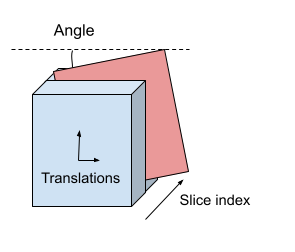
<br>
<center>Figure 1: Schematic representation of the four registration parameters.</center>

   
The best solution is given by the parameters which maximize the similarity between the mapped ’moving’ image and the
’fixed’ reference image. Different similarity metrics can be used for this application but for this challenge you
will have to implement 2 different metrics.

<font size=4 color=#009999> 3.1 Sum of Squared Differences </font> <br> <br>
The sum of squared differences (SSD) is computed using the following equation:
$$ SSD = \sum_{[i,j] in R} (M(i,j)-F(i,j))^{2} $$

<div style="text-align: justify"> where $M$ and $F$ stand for ’moving’ and ’fixed’ images respectively, R is the intersection region between the two images and i and j are all pixels belonging to this region. Note that the SSD has to be normalized according to the number of pixels that are present in the intersection between ’fixed’ and ’moving’ images.

<font size=4 color=#009999> 3.2 Mutual Information </font> <br> <br>
<div style="text-align: justify"> The mutual information (MI) is a measure of the information contained in both images (=entropy) compared to the information they have in common (=joint entropy). In other words, it measures how well one of those images can predict the other one, and so how similar they are in the sense of information theory. The (normalized) mutual information is computed as follows:
 
$$ I(X,Y) = \frac{H(X)+H(Y)-H(X,Y)}{max(H(X),H(Y))} $$ 

where $$ H(X) = -\sum_{x}p(x_{i})logp(x_{i}) $$
 
and $$ H(X,Y) =	-\sum_{x,y} p(x_{i}, y_{j})logp(x_{i}, y_{j}) $$

<div style="text-align: justify">The probabilities $p(x_{i})$ is a $N$ x $1$ vector ($N$ being the number of intensity values, basically 256 for uint8 images) representing the probability of occurence of each intensity value. This is basically just a histogram of the image, normalized so that its integral is equal to 1. The joint probabilities $p(x_{i}, y_{j})$ is a $N$ x $N$ matrix representing the probability of occurence of each couple of intensity values. For instance, $p$(154, 103) is the number of pixels which have a value of 154 in the first image and a value of 103 in the second image, divided by the total number of pixels. <br><br>



<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
Import the 3D and 2D images and normalize the 3D image between 0 and 1 (Not the 2D slices). Show a coronal, a sagittal and a transversal view of the 3D image and display the 2D images.

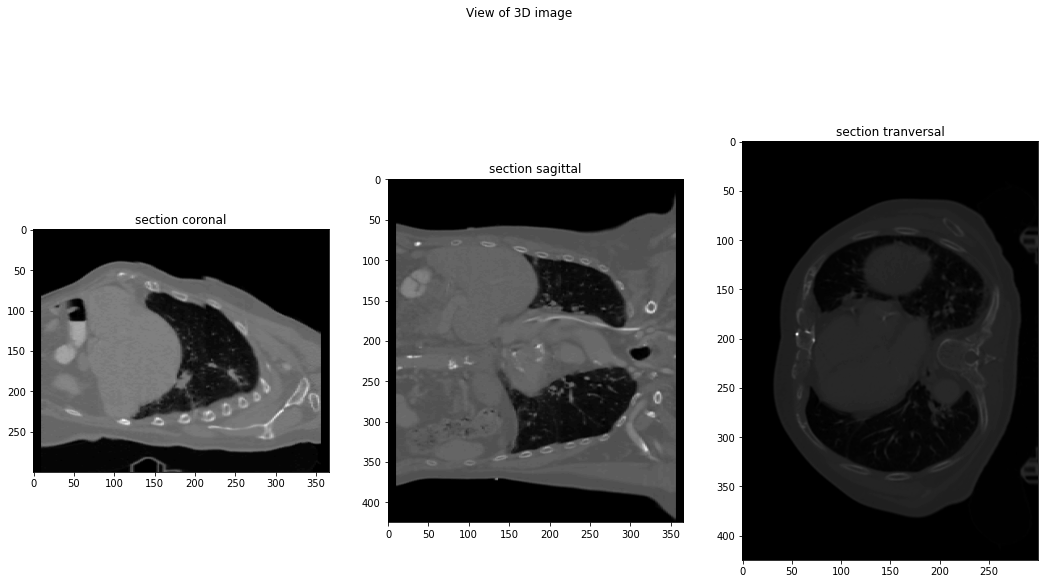

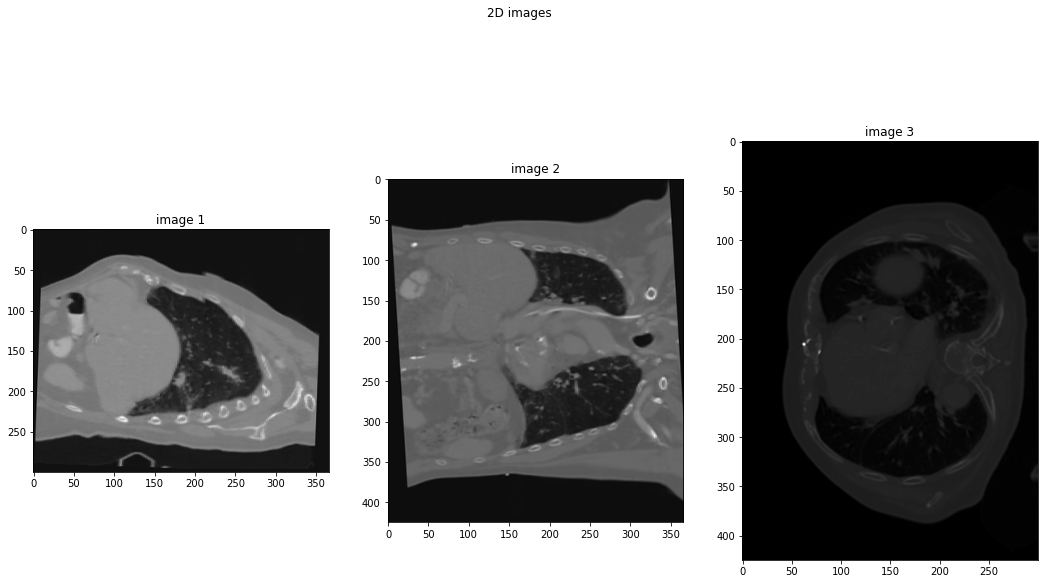

In [3]:
# Question 1 code

import numpy as np
import matplotlib.pyplot as plt


image3D = np.load('imgs/3DImage.npy')/255
#print(image3D.shape, type(image3D[0,0,0]), np.max(image3D), np.min(image3D))


fig, axs = plt.subplots(1,3,figsize=(18,10))
fig.suptitle('View of 3D image')
axs[0].imshow(image3D[120,:,:],cmap = "gray")
axs[0].set_title("section coronal")
axs[1].imshow(image3D[:,150,:],cmap = "gray")
axs[1].set_title("section sagittal")
axs[2].imshow(image3D[:,:,175],cmap = "gray")
axs[2].set_title("section tranversal")
plt.show()

image2D0 = np.load('imgs/2DImage0.npy')
image2D1 = np.load('imgs/2DImage1.npy')
image2D2 = np.load('imgs/2DImage2.npy')


fig, axs = plt.subplots(1,3,figsize=(18,10))
fig.suptitle('2D images')
axs[0].imshow(image2D0,cmap = "gray")
axs[0].set_title("image 1")
axs[1].imshow(image2D1,cmap = "gray")
axs[1].set_title("image 2")
axs[2].imshow(image2D2,cmap = "gray")
axs[2].set_title("image 3")
plt.show()




<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
To simplify a little bit the problem and spare your tired laptops, we will first find a rough approximation for the 4th registration parameter, the slice index. The slice index is an integer. Find manually a rough approximation of the selected slice index parameter for each image orientation by observing the 3D data and plot the slice selected by your approximation. <br>

In [4]:
# Question 2 code

approxSliceIndex0 = 120
approxSliceIndex1 = 150
approxSliceIndex2 = 175

diff_corr = image3D[120,:,:]-image2D0


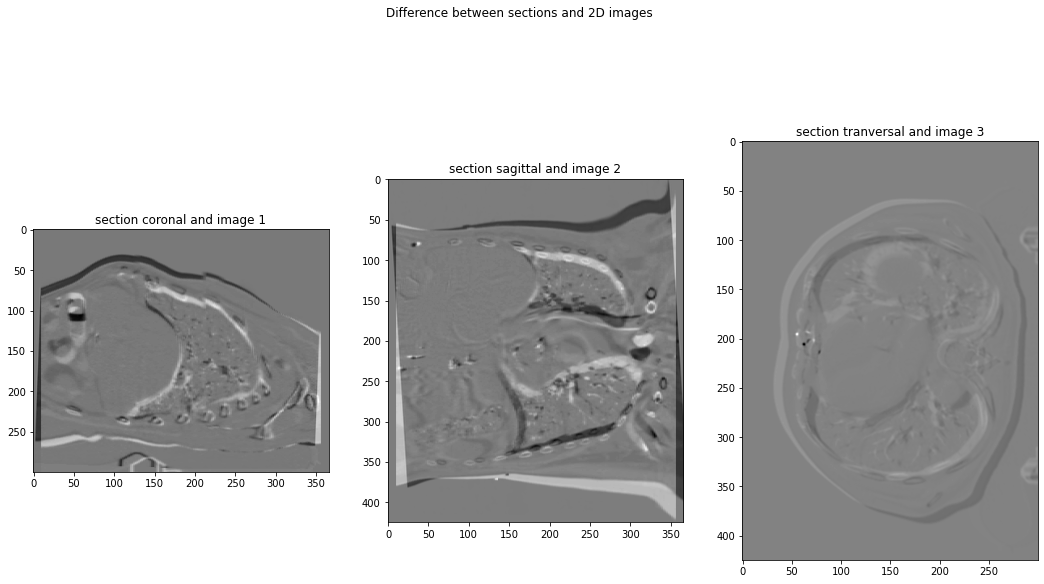

In [5]:
fig, axs = plt.subplots(1,3,figsize=(18,10))
fig.suptitle('Difference between sections and 2D images')
axs[0].imshow(diff_corr,cmap = "gray")
axs[0].set_title("section coronal and image 1")
axs[1].imshow(image3D[:,150,:]-image2D1,cmap = "gray")
axs[1].set_title("section sagittal and image 2")
axs[2].imshow((image3D[:,:,175]-image2D2),cmap = "gray")
axs[2].set_title("section tranversal and image 3")
plt.show()

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
Implement the normalized SSD and normalized MI metrics.

In [6]:
#Question 3 code

def SSD(im1, im2): 
    """ -----------------------------------------------------------------------------------------
    Computes normalized SSD between two images
    INPUT : 
        - im1, im2 : the two images
    OUPUT: 
        - normalized SSD between im1 and im2
    ----------------------------------------------------------------------------------------- """
    if im1.shape != im2.shape:
        print("Error")
        return
    return np.sum((np.array(im1, dtype=np.float32) - np.array(im2, dtype=np.float32))**2)/(im1.size)



def MI(im1, im2):
    """ -----------------------------------------------------------------------------------------
    Computes normalized MI between two images
    INPUT : 
        - im1, im2 : the two images
    OUPUT: 
        - normalized MI between im1 and im2
    ----------------------------------------------------------------------------------------- """
    bins =(256,256)
    hist_2d, x_edges, y_edges = np.histogram2d(im1.ravel(), im2.ravel(), bins)

    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = px[:, None] * py[None, :]
    
    nonnzeros_px = px>0
    px_sum = -np.sum(px[nonnzeros_px]*np.log(px[nonnzeros_px]))
    nonnzeros_py = py>0
    py_sum = -np.sum(py[nonnzeros_py]*np.log(py[nonnzeros_py]))
    
    nonzeros_pxy = pxy > 0 
    px_py_sum = -np.sum(pxy[nonzeros_pxy]*np.log(pxy[nonzeros_pxy]))
    
    nonzeros = pxy > 0 
    #return (np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros])))
    return ((py_sum+px_sum -px_py_sum)/max(py_sum,px_sum))
    


<div class="alert alert-info">

The next cell contains everything you need to run a rigid registration method. 
<div style="text-align: justify">Once a metric is chosen, the optimization of the metric function according to the four parameters can be easily achieved by using a simple gradient descent algorithm. The minimization of a loss function can be implemented through the minimize function from scipy.optimize. The Cobyla method is a powerfull tool for constrained optimization.<br>
<br>
Read the code, try to understand everything and in particular the select_translate_rotate_and_crop function (useful for question 5). Then, simply execute it to define the functions.

In [7]:
# Just run this cell to be able to call the rigid_registration function, nothing to change here

from scipy import ndimage
from scipy.optimize import minimize


def rigid_registration(fixed2D, moving3D, x_init, selectedOrientation, metric_name='SSD'): # You don't need to modify this
    """ -----------------------------------------------------------------------------------------
    Minimizes a metric (default=SSD) between two images(fixed and moving) by finding the best 
    translation vector 
    INPUT : 
        - fixed: fixed image
        - moving: moving image to register 
        - x_init: initial translation vector [x, y] 
        - (metric_name: either SSD or MI which is the metric to minimize)
    OUPUT: 
        - translation vector [x, y] minimizing the metric between fixed and moving images
    ----------------------------------------------------------------------------------------- """ 
    if metric_name == 'SSD': 
        _metric = _SSD
    elif metric_name == 'MI': 
        _metric = _MI
    rows, cols = fixed2D.shape[0], fixed2D.shape[1]
    res = minimize(_metric, x_init, args=(fixed2D, moving3D, selectedOrientation), method='COBYLA', bounds=((-rows, rows), (-cols, cols)), options={'disp': False})

    return res


def _SSD(x, fixed2D, moving3D, selectedOrientation): # You don't need to modify this
    """ -----------------------------------------------------------------------------------------
    Computes SSD between a fixed image and a translated moving image 
    INPUT : 
        - fixed: fixed image
        - moving: moving image to translate 
        - x: translation vector [x, y] 
    OUPUT: 
        - SSD between fixed and moving translated by vector x
    ----------------------------------------------------------------------------------------- """
    
    croped_fixed, croped_deformed = select_translate_rotate_and_crop(x, fixed2D, moving3D, selectedOrientation)
    ssd      = SSD(croped_fixed, croped_deformed)
    #ssd_norm = np.sqrt( ssd/( (croped_fixed.shape[0]*croped_fixed.shape[1])**2 ) )
    return ssd


def _MI(x, fixed2D, moving3D, selectedOrientation): # You don't need to modify this
    """ -----------------------------------------------------------------------------------------
    Computes 1-MI between a fixed image and a translated moving image 
    INPUT : 
        - fixed: fixed image
        - moving: moving image to translate 
        - x: translation vector [x, y] 
    OUPUT: 
        - 1-MI value between fixed and moving translated by vector x
    ----------------------------------------------------------------------------------------- """ 
    
    croped_fixed, croped_deformed = select_translate_rotate_and_crop(x, fixed2D, moving3D, selectedOrientation)
    mi      = MI(croped_fixed, croped_deformed)
    mi      = 1-mi
    #mi_norm = mi / (np.log(croped_fixed.shape[0]) * np.log(croped_fixed.shape[1]))
    return mi


def getSliceFrom3D(image3D, selectedOrientation, selectedSliceIndex): # You don't need to modify this
    """ -----------------------------------------------------------------------------------------
    Extract a slice from a 3D matrix 
    INPUT : 
        - image3D: the 3 image
        - selectedOrientation: the orientation of the extracted slice 
        - selectedSliceIndex: the index of the extracted slice
    OUPUT: 
        - the extracted slice
    ----------------------------------------------------------------------------------------- """ 
    if selectedOrientation == 0:
        selectedSlice = image3D[selectedSliceIndex, :, :]
    elif selectedOrientation == 1:
        selectedSlice = image3D[:, selectedSliceIndex, :]
    elif selectedOrientation == 2:
        selectedSlice = image3D[:, :, selectedSliceIndex]
    return selectedSlice


def select_translate_rotate_and_crop(regParams, fixed2D, moving3D, selectedOrientation): # You don't need to modify this
    
    """ -----------------------------------------------------------------------------------------
    Select a 2D slice of a 3D moving image using the slice index (regParams[3]), translate this 2D moving slice by a vector (regParams[0], regParams[1]), 
    then rotate it around it's center by an angle (regParams[2]) and returns overlapping regions between fixed and moving 
    images 
    INPUT : 
        - fixed2D: fixed 2D image
        - moving3D: moving 3D image
        - x: parameter vector [translation x, translation y, rotation angle, selected slice index] 
    OUPUT: 
        -  overlapping regions between fixed and the selected, translated and roted version of moving 
    ----------------------------------------------------------------------------------------- """ 
    
    rows, cols = fixed2D.shape[0], fixed2D.shape[1]
    if np.abs(regParams[0])>cols or np.abs(regParams[1])>rows: 
        raise ValueError('The translation is higher than the image dimensions.')
    
    #select a slice from the 3D image --> the dimension is hard coded in this version
    #moving2D = moving3D[:, int(round(regParams[3])), :]
    moving2D = getSliceFrom3D(moving3D, selectedOrientation, int(round(regParams[3])))
    
    # compute the translated moving image according to vector x
    translated = ndimage.interpolation.affine_transform(moving2D, [[1,0],[0,1]], offset=(regParams[0], regParams[1]), output_shape=(rows,cols))
    translated_and_rotated = ndimage.rotate(translated, regParams[2], reshape=False)
    
    # Removing the borders (keeping only intersection between images)
    croped_fixed, croped_deformed = fixed2D, translated_and_rotated 
    if regParams[0]>0:
        croped_fixed    = croped_fixed[:,int(regParams[0]):]
        croped_deformed = croped_deformed[:,int(regParams[0]):]
    elif regParams[0]<0:
        croped_fixed    = croped_fixed[:,:cols-int(regParams[0])]
        croped_deformed = croped_deformed[:,:cols-int(regParams[0])]
    if regParams[1]>0:
        croped_fixed    = croped_fixed[int(regParams[1]):,:]
        croped_deformed = croped_deformed[int(regParams[1]):,:]
    elif regParams[1]<0:
        croped_fixed    = croped_fixed[:rows-int(regParams[1]),:]
        croped_deformed = croped_deformed[:rows-int(regParams[1]),:]

    return croped_fixed, croped_deformed


<div class="alert alert-info">
<b>QUESTION 4</b>  <br>
Use the rigid registation method you implemented on the three given 2D images using both metrics. <br>

In [12]:
#Question 4 code

# Chose initial values for the registration parameters
initialTranslationX = 0
initialTranslationY = 0
initialAngle = 0
approxSliceIndexToUse = approxSliceIndex1
metric = 'SSD'

# to select which of the 3 orientation is the orientation of the 2D image
# 0 --> Sagittal
# 1 --> Coronal
# 2 --> Transversal

selectedOrientation = 1

x_res = rigid_registration(image2D1, image3D, [initialTranslationX, 
                                               initialTranslationY, 
                                               initialAngle, 
                                               approxSliceIndexToUse], selectedOrientation, metric)

print(x_res)
print('-' * 50)
print(x_res.x)

     fun: 2.265301026523877e-05
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 96
  status: 1
 success: True
       x: array([  8.0052074 ,  -3.95667615,   3.49982945, 151.25736546])
--------------------------------------------------
[  8.0052074   -3.95667615   3.49982945 151.25736546]


<div class="alert alert-info">
<b>QUESTION 5</b>  <br>
Show the result of the registration by completing the showResults function of the next cell. The goal of the function is to show the difference between the registered moving image and the fixed image, and to print the used metric value. Hint: re-use the code from the select_translate_rotate_and_crop function.<br>

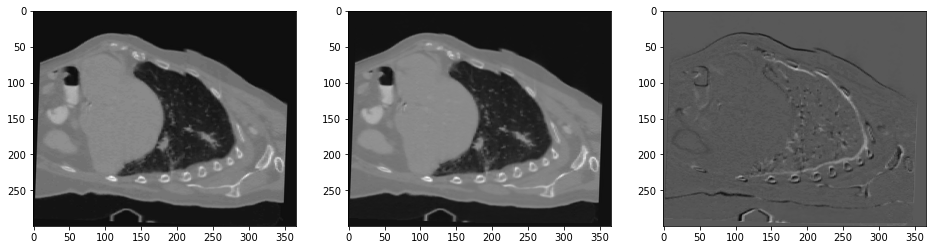

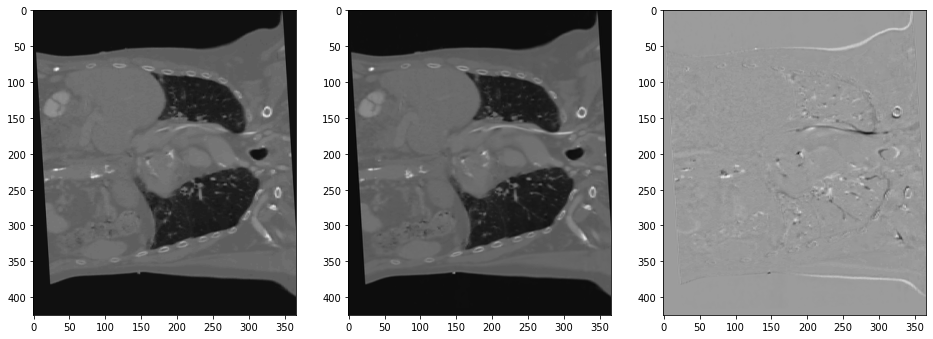

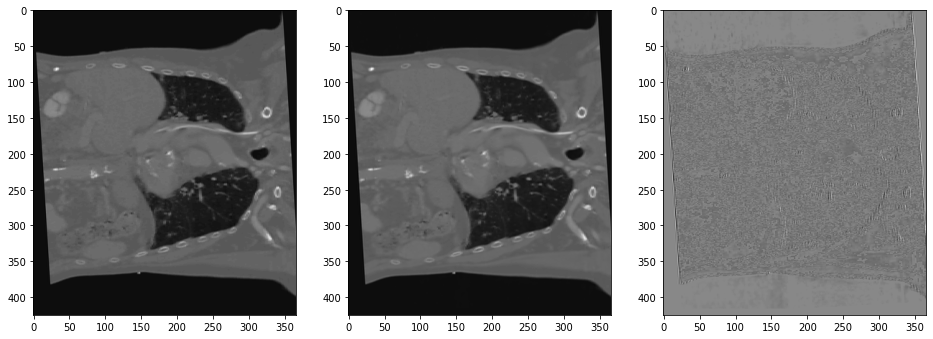

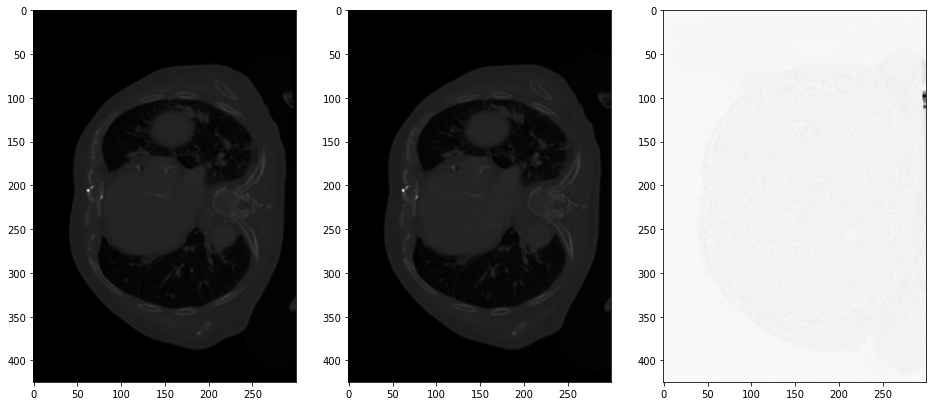

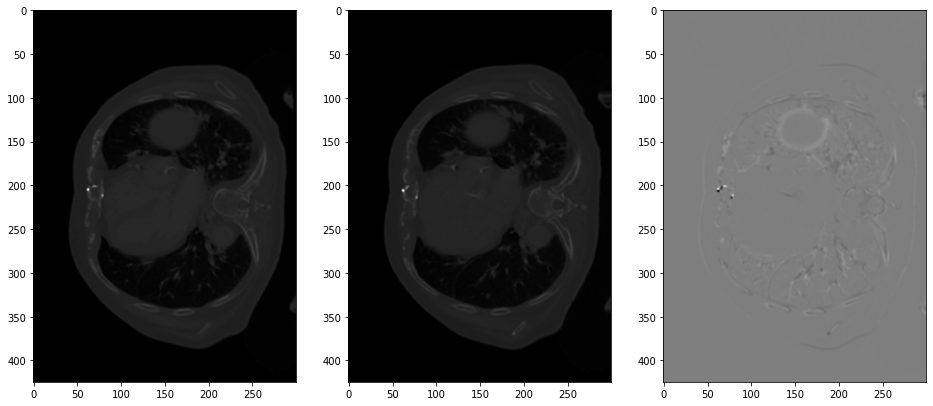

In [11]:
#Question 5 code

def showResults(fixed2D, moving3D, regParams, selectedOrientation, metric_name = 'SSD'):
    
    rows, cols = fixed2D.shape[0], fixed2D.shape[1]
    moving2D = getSliceFrom3D(moving3D, selectedOrientation, int(round(regParams[3])))
    translated = ndimage.interpolation.affine_transform(moving2D, [[1,0],[0,1]], offset=(regParams[0], regParams[1]), output_shape=(rows,cols))
    moving2D = ndimage.rotate(translated, regParams[2], reshape=False)
    fig, axs = plt.subplots(1,3,figsize =(16,10))
    axs[0].imshow(moving2D,cmap="gray")
    axs[1].imshow(fixed2D,cmap="gray")
    axs[2].imshow(moving2D - fixed2D,cmap="gray")
    plt.show()
    
    
showResults(image2D0, image3D,[3.75103974,2.86474069,-2.09918256,123.04171365], 0, "SSD")

showResults(image2D1, image3D,[ 8.0052074,-3.95667615,3.49982945,151.25736546], 1, "SSD")
showResults(image2D1, image3D,[7.96336815,-4.04942522 ,3.49967908,150.26005062], 1, "MI")

showResults(image2D2, image3D,[ -5.68160959,-6.54313262,1.60129559,178.04938004], 2, "SSD")
showResults(image2D2, image3D,[ -5.65592621,-6.96826988,1.57447533,176.50110105], 2, "MI")


<div class="alert alert-info">
<b>QUESTION 6</b>  <br>
Which metric seems the best for this problem and why ?<br>

The best metric is SSD. We can see above that the best rigid registrations are obtained by using the SSD metric. When we use the SSD metric, the metric tends to zero when the rigid registration is good. 